In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
acc_score = od()

In [2]:
def get_entropy_from_culling_factor(c):
    S = od({1: 0})
    for E in range(0, -len(c) + 2, -1):
        S[E] = S[E + 1] + np.log(1 - c[E + 1])
    for E in range(0, -len(c) + 2, -1):
        S[E] += np.log(c[E])
    return S

def get_ln_DOS_from_entropy(S, N):
    g = od()
    Z = 0
    for E, s in S.items():
        t = s
        if E <= -N and E % 2 == 0 and E != -2*N+2:
            g[E] = t
    timex = g[-N]
    for E in g:
        g[E] -= timex
    return g

def get_ln_DOS(N):
    DOS = od()
    E = 0
    with open("2DIsing_DOS_L40.txt", "r") as f:
        for line in f:
            if E <= -N and E % 2 == 0 and E != -2*N+2:
                DOS[E] = float(line)
            E-=2
        timex = DOS[-N]
        for E in DOS:
            DOS[E] -= timex
    return DOS

In [19]:
L=40;
N=L*L;
R=1024 * 1024;
nSteps=50;
seed=0;
ln_DOS=get_ln_DOS(N);
name = "./datasets/2DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
culling_factor = od()
culling_factor[1] = 0
culling_factor[0] = 0
N = int(name.split("_N")[1].split("_R")[0])
R = int(name.split("_R")[1].split("_nSteps")[0])
print(N, R, nSteps)
with open(name) as f:
    for line in f:
        E, c = map(float, line.split())
        culling_factor[E] = c
#culling_factor[-2*N] = 1.0

S = get_entropy_from_culling_factor(culling_factor)
lng = get_ln_DOS_from_entropy(S, N)

1600 1048576 50


C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


No handles with labels found to put in legend.


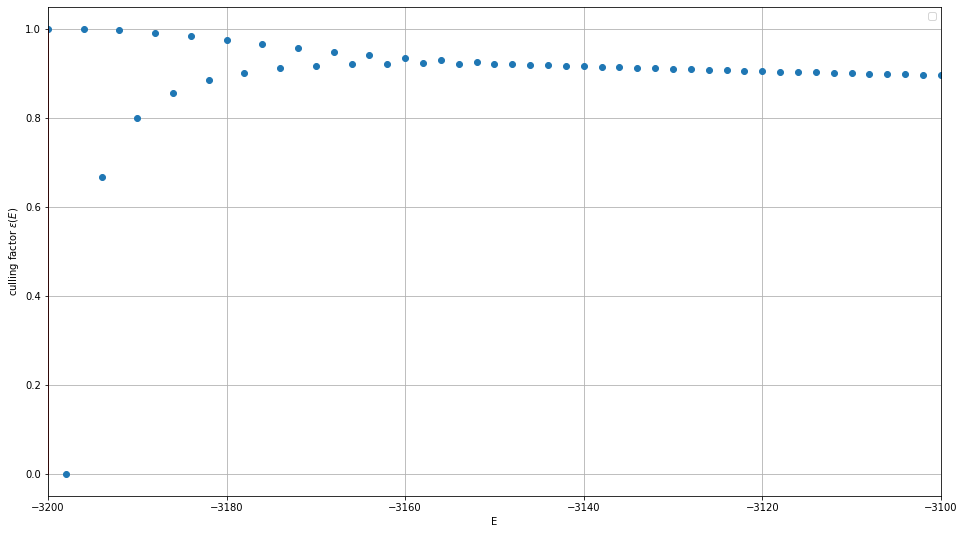

In [20]:
plt.figure(figsize=(16, 9))
plt.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')
plt.plot([-3200, -3200], [0, 1], c='r')

plt.ylabel("culling factor $\epsilon(E)$")
plt.xlabel("E")
#plt.yscale("log")
plt.xlim([-3200, -3100])
plt.legend()
plt.grid()
#plt.savefig("2.png")

No handles with labels found to put in legend.


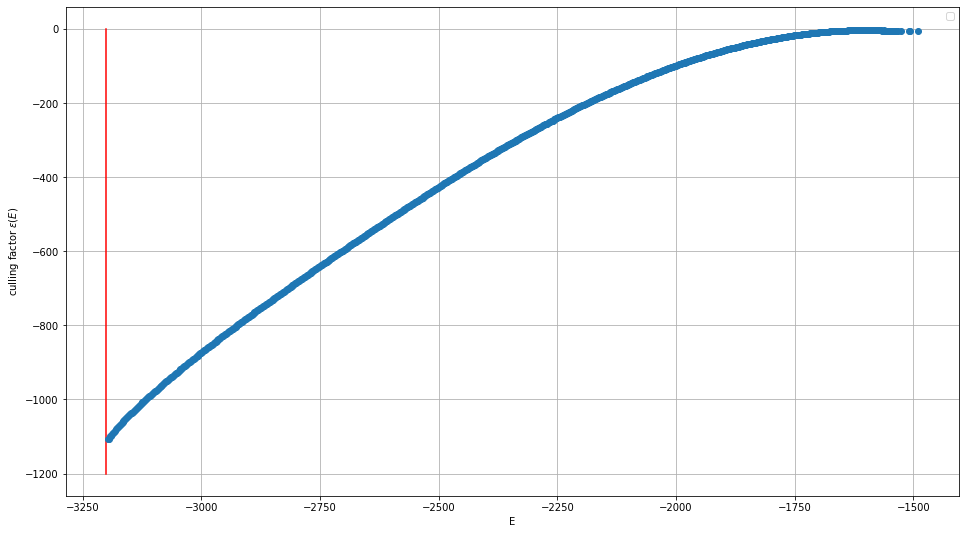

In [6]:
plt.figure(figsize=(16, 9))
plt.plot([-3200, -3200], [0, -1200], c='r')
plt.plot([E for E in S if E % 2 == 0], [c for E, c in S.items() if E % 2 == 0], 'o')

plt.ylabel("culling factor $\epsilon(E)$")
plt.xlabel("E")
#plt.yscale("log")
plt.legend()
plt.grid()
#plt.savefig("2.png")

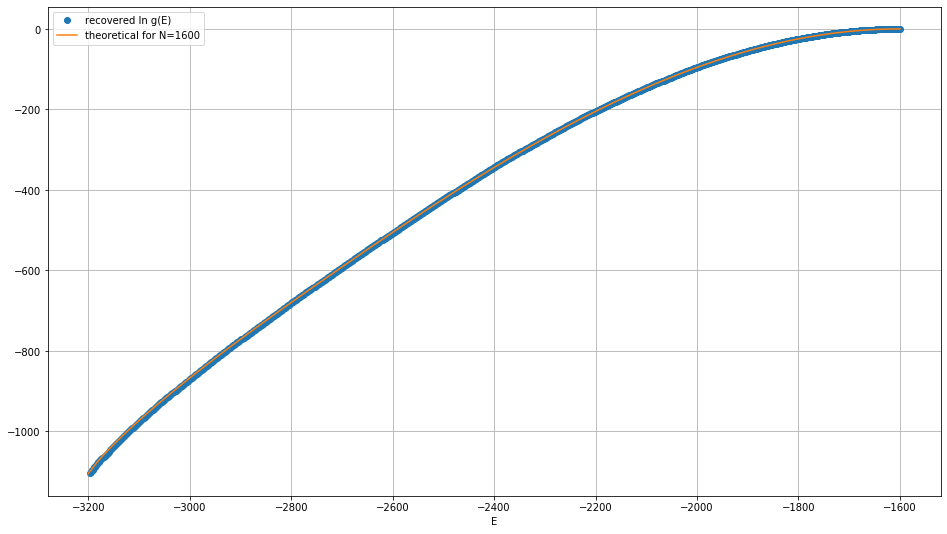

In [7]:
plt.figure(figsize=(16, 9))
threshold = -N
plt.plot([E for E in lng if E <= threshold], [lng[E] for E in lng if E <= threshold], 'o', label="recovered ln g(E)")
plt.plot([E for E in ln_DOS if E <= threshold], [ln_DOS[E] for E in ln_DOS if E <= threshold], '-', label="theoretical for N={}".format(N))

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()


In [8]:
max(ln_DOS[E] for E in ln_DOS) - min(ln_DOS[E] for E in ln_DOS), N * (np.log(2) - 1)

(1104.774635418979, -490.96451110408753)

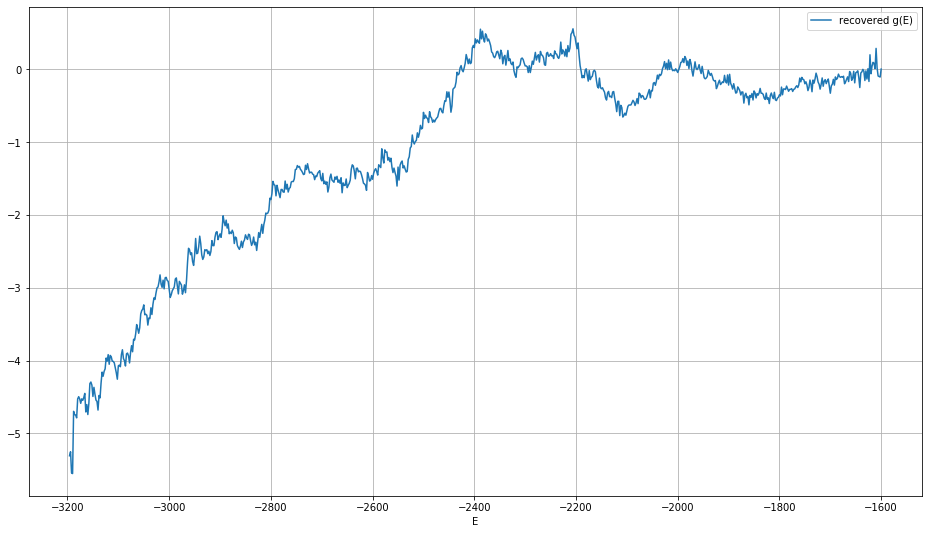

In [9]:
plt.figure(figsize=(16, 9))
threshold = -N
plt.plot([E for E in lng if E <= threshold], [lng[E] - ln_DOS[E] for E in lng if E <= threshold], '-', label="recovered g(E)")

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()


C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


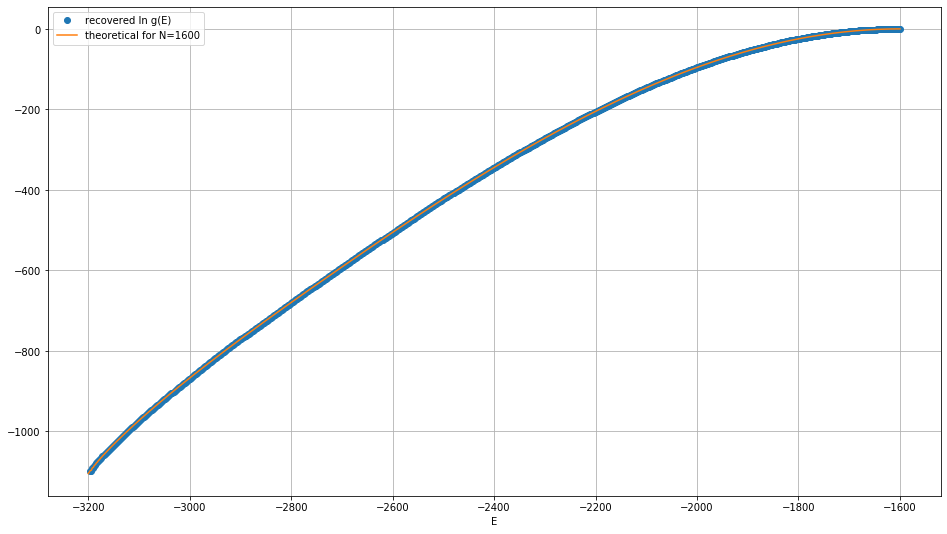

In [10]:
R=1024
nSteps=1
seed=0
name = "./datasets/2DIsing_N1600_R{}_nSteps{}_run{}X.txt".format(R, nSteps, seed)
culling_factor = od()
culling_factor[1] = 0
culling_factor[0] = 0
N = int(name.split("_N")[1].split("_R")[0])
R = int(name.split("_R")[1].split("_nSteps")[0])
#print(N, R, nSteps, seed)
with open(name) as f:
    for line in f:
        E, c = map(float, line.split())
        culling_factor[E] = c
culling_factor[-2*N] = 1.0

ln_DOS=get_ln_DOS(N);

S = get_entropy_from_culling_factor(culling_factor)
lng = get_ln_DOS_from_entropy(S, N)

#plt.figure(figsize=(16, 9))
#plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
#plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

#plt.yscale("log DOS")
#plt.ylabel("log")
#plt.legend()
#plt.grid()
#plt.show()
threshold = -N
def zn(x):
    if not isinstance(x, float):
        return 0.0
    return x
acc = sum([zn(abs(ln_DOS[E] - lng[E])) for E in lng if E <= threshold])
acc_score[(R, seed, nSteps)] = acc

plt.figure(figsize=(16, 9))
threshold = -N
plt.plot([E for E in lng if E <= threshold], [lng[E] for E in lng if E <= threshold], 'o', label="recovered ln g(E)")
plt.plot([E for E in ln_DOS if E <= threshold], [ln_DOS[E] for E in ln_DOS if E <= threshold], '-', label="theoretical for N={}".format(N))

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()


In [11]:
[abs(ln_DOS[E] - lng[E]) for E in lng if E <= threshold]

[0.0,
 0.09183332513486642,
 0.11388153134187107,
 0.22912819168246568,
 0.06098632095962486,
 0.1654508542645985,
 0.07087303098645403,
 0.05160083069000443,
 0.012998573842852856,
 0.06832664660111609,
 0.04853329157356434,
 0.14471339196416988,
 0.17273497406918636,
 0.13560743505980888,
 0.10560868211341301,
 0.025135848240014802,
 0.013760834154282975,
 0.020278326023719373,
 0.12795019321573342,
 0.11455917376910385,
 0.00801871446151825,
 0.08435640591800464,
 0.0064767322863037435,
 0.14322713256622066,
 0.11054171180452066,
 0.16221693899579215,
 0.08238603865209093,
 0.007726046061726777,
 0.08667035975606119,
 0.07039459151388794,
 0.07559853597369148,
 0.032850407809464244,
 0.05155457650529982,
 0.10188171940968083,
 0.1549641159341517,
 0.09136936697833509,
 0.10074156908781973,
 0.07375541399937902,
 0.08829523504430004,
 0.07149546168327614,
 0.0020837522506091943,
 0.0368482716039118,
 0.040101303277197076,
 0.08175358061420113,
 0.03752909724448017,
 0.035059428899110

R movement

In [24]:
acc_score = od()
last_point = od()
for nSteps in [1, 2, 5, 10, 30, 50]:
    for seed in [0]:
        for R in [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]:#, 4190208, 8388608]: 
            try:
                name = "./datasets/2DIsing_N1600_R{}_nSteps{}_run{}X.txt".format(R, nSteps, seed)
                culling_factor = od()
                culling_factor[1] = 0
                culling_factor[0] = 0
                N = int(name.split("_N")[1].split("_R")[0])
                R = int(name.split("_R")[1].split("_nSteps")[0])
                #print(N, R, nSteps, seed)
                with open(name) as f:
                    for line in f:
                        E, c = map(float, line.split())
                        culling_factor[E] = c
                culling_factor[-2*N] = 1.0

                ln_DOS=get_ln_DOS(N);

                S = get_entropy_from_culling_factor(culling_factor)
                lng = get_ln_DOS_from_entropy(S, N)

                #plt.figure(figsize=(16, 9))
                #plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
                #plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

                #plt.yscale("log DOS")
                #plt.ylabel("log")
                #plt.legend()
                #plt.grid()
                #plt.show()
                threshold = -N
                def zn(x):
                    if np.isnan(x) or x == float('-inf') or x == float('inf'):
                        return 0.0
                    return x
                acc = sum([zn(abs(ln_DOS[E] - lng[E])) for E in lng if E <= threshold])
                acc_score[(R, seed, nSteps)] = acc
                last_point[(R, seed, nSteps)] = -N in lng and not np.isnan(lng[-N])
            except:
                pass

C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


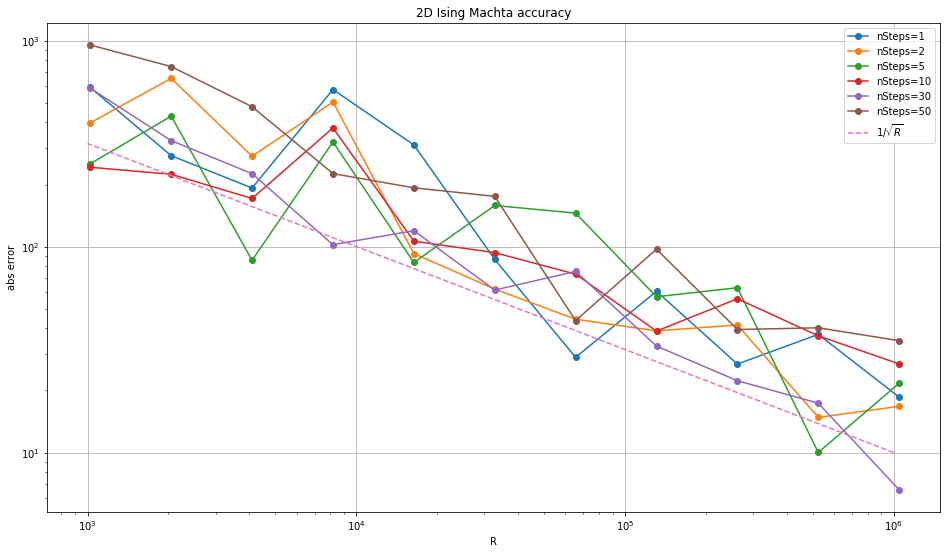

In [28]:
plt.figure(figsize=(16, 9))
for z in [1, 2, 5, 10, 30, 50]:
    plt.plot([R for R, seed, nSteps in acc_score if nSteps == z], [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z], 'o-', label="nSteps={}".format(z))
    #optional
    plt.scatter([R for R, seed, nSteps in acc_score if nSteps == z and not last_point[(R, seed, nSteps)]],
                 [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z and not last_point[(R, seed, nSteps)]], s=500, marker='$O$')

x = [1000000, 1000]
plt.plot(x, [10000/np.sqrt(y) for y in x], '--', label="$1/\sqrt{R}$")

plt.title("2D Ising Machta accuracy")
plt.legend()
plt.ylabel("abs error")
plt.xlabel("R")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.savefig("2DisingMachtaAccuracy.png", bbox_inches='tight')
plt.show()